In [28]:
# (i) Once training loss is going down and (ii) validation metrics are improving , we're almost there
# Next step: (iii) need to get model for Overfitting by increasing:
# (iii) (a) Number of layers
# (iii) (b) Bigger layers, that is, number of units (layers with more parameters)

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

(60000, 28, 28)

In [31]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [32]:
model = keras.Sequential([
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history_small_model = model.fit(train_images,
                                train_labels,
                                epochs = 20,
                                batch_size = 128,
                                validation_split = 0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7378 - loss: 1.0503 - val_accuracy: 0.9052 - val_loss: 0.3615
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8987 - loss: 0.3687 - val_accuracy: 0.9132 - val_loss: 0.3100
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9084 - loss: 0.3244 - val_accuracy: 0.9178 - val_loss: 0.2943
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.2994 - val_accuracy: 0.9222 - val_loss: 0.2834
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9180 - loss: 0.2914 - val_accuracy: 0.9219 - val_loss: 0.2787
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9215 - loss: 0.2826 - val_accuracy: 0.9251 - val_loss: 0.2775
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9210 - loss: 0.2801 - val_accuracy: 0.9256 - val_loss: 0.2719
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9245 - loss: 0.2703 - val_accuracy: 0.

In [33]:
history_dict = history_small_model.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

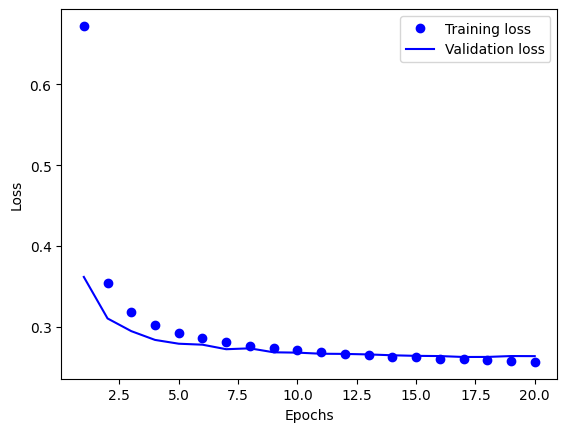

In [34]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b-', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Validation loss stalls, instead of peaking and reversing course

In [35]:
model = keras.Sequential([
    layers.Dense(96, activation = "relu"),
    layers.Dense(96, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history_large_model = model.fit(train_images,
                                train_labels,
                                epochs = 20,
                                batch_size = 128,
                                validation_split = 0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8206 - loss: 0.6372 - val_accuracy: 0.9449 - val_loss: 0.1905
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9492 - loss: 0.1728 - val_accuracy: 0.9595 - val_loss: 0.1371
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9672 - loss: 0.1111 - val_accuracy: 0.9648 - val_loss: 0.1171
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9740 - loss: 0.0874 - val_accuracy: 0.9710 - val_loss: 0.0979
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0672 - val_accuracy: 0.9728 - val_loss: 0.0908
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9832 - loss: 0.0531 - val_accuracy: 0.9738 - val_loss: 0.0927
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9731 - val_loss: 0.0996
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.

In [36]:
history_dict_large = history_large_model.history

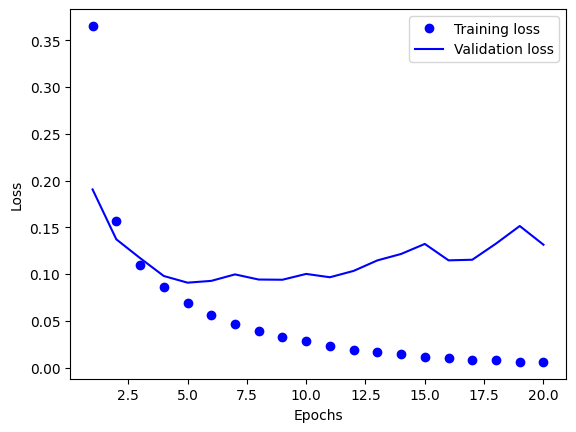

In [37]:
loss = history_dict_large['loss']
val_loss = history_dict_large['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b-', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [38]:
# The validation curve now looks exactly like it should: the model fits fast and starts overfitting after 8 epochs